### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.
</br> The outliers may suggest experimental errors, variability in a measurement, or an anomaly. The age of a person may wrongly be recorded as 200 rather than 20 Years. Such an outlier should definitely be discarded from the dataset.
</br>However, not all outliers are bad. Some outliers signify that data is significantly different from others. For example, it may indicate an anomaly like bank fraud or a rare disease.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### What are the criteria to identify an outlier?

1. Data point that falls outside of 1.5 times of an **interquartile range** above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a **z score** and if the z score falls outside of 2 standard deviation

### What is the reason for an outlier to exists in a dataset?

1. Variability in the data
2. An experimental measurement error

### What are the impacts of having outliers in a dataset?

1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range



In [30]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

## Detecting outlier using Z score

### Using Z score

**Z score tells how many standard deviations away a data point is from the mean.**
<br/>Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

<img src="files/zscore.png" width="700" height="600">

In [35]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [32]:
outlier_pt=detect_outliers(dataset)

In [33]:
outlier_pt

[102, 107, 108]

## InterQuantile Range

75%- 25% values in a dataset

### Steps
#### 1. Arrange the data in increasing order
#### 2. Calculate first(q1) and third quartile(q3)
#### 3. Find interquartile range (q3-q1)
#### 4.Find lower bound IQR * (q1 - 1.5)
#### 5.Find upper bound IQR * (q3+1.5)

Anything that lies outside of lower and upper bound is an outlier

In [36]:
## Perform all the steps of IQR
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [37]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [38]:
print(quantile1,quantile3)

12.0 15.0


In [39]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [41]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

In [42]:
print(lower_bound_val,upper_bound_val)

7.5 19.5


In [43]:
outliers = []
for i in dataset:
    if i> upper_bound_val or i<lower_bound_val:
        outliers.append(i)

In [44]:
outliers

[102, 107, 108]

### Following code can also be used to calculate IQR

In [46]:
from scipy import stats 
IQR = stats.iqr(dataset, interpolation = 'midpoint') 
IQR 


3.0

# Outlier using Boxplot

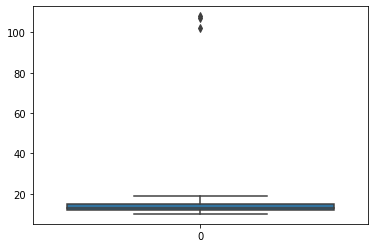

In [48]:
import seaborn as sns
sns.boxplot(data = dataset)

# Scatterplot

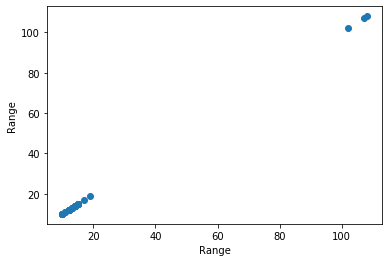

In [56]:
plt.scatter(x=np.array(dataset), y=np.array(dataset))
plt.xlabel('Range')
plt.ylabel('Range')
plt.show()